# Decision Trees

We're going to skip ahead in Avik's progression to Decision Trees in order to stick with the theme of classification algorithms. Decision trees are not used frequently in analysis, but they are inutitive and easy to understand. A more useful algorithm is Random Forests, which is based on Decision Trees, and we will be looking at that later.

Decision trees are a type of supervised learning algorithm used mainly for classification problems. One big advantage of decision trees is that it works for both categorical and numerical variables. Remember that being a supervised learning algorithm means we have to first train a decision tree algorithm with historical data to form our model. We can then apply our fitted model to new data in order to classify the new data.

Again, Avik's infographic is great and can be found at:

https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Code/Day%2025%20Decision%20Tree.md


## Importing the libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [51]:
# read in the dataset, remember to modify the path name for your environment
#
# This dataset contains information on users in a social network. The data includes a user id, gender type,
# the age, and the estimated salary. A car company has just launched their brand new luxury SUV and they
# are trying to see which of these users of the social network are predicted to buy this brand new SUV.
# The last column indicates if the user bought this SUV (dependent variable). We are going to build a model 
# that is going to predict if a user is going to buy or not the SUV based on the age and the estimated salary
# independent variables. 
#
dataset = pd.read_csv('data/Social_Network_Ads.csv')
# let's take a quick look at the data attributes
print(dataset.head())
# set up the x using only the Age and EstimatedSalary attribute values
x = dataset.iloc[:,[2,3]].values
# set up the y with the Purchased attribute values
y = dataset.iloc[:, 4].values
# let's take a quick look at each data frame
print('shape of the full dataset looks like ', dataset.shape)
print('x looks like: ', x[0:3])
print('y looks like: ', y[0:3])

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
shape of the full dataset looks like  (400, 5)
x looks like:  [[   19 19000]
 [   35 20000]
 [   26 43000]]
y looks like:  [0 0 0]


## Splitting the dataset into the Training set and the Test set

In [52]:
# we're going to use our usual 80/20 training/test data split to train the algorithm and to test it.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


## Feature Scaling

In [53]:
# as usual, we wil normalize the data for the x and y data sets before we build and fit our model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# this will analyze the features and fit a normal mean and standard distribution and then transform the values
x_train_norm = sc.fit_transform(x_train) 
# using the previous fitted normalization this will transform the test set
x_test_norm = sc.transform(x_test)

print('Here is the scaled training data ', x_train_norm[:10])
print('Here is the scaled test data ', x_train_norm[:10])

Here is the scaled training data  [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]
Here is the scaled test data  [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]


/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting Decision Tree Classification to the Training Set

Details regarding the decision tree classifier and associated parameters can be found at:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [59]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# at this point we use the decision tree classifier to fit the x training data to the y result
classifier.fit(x_train, y_train)

print(classifier.feature_importances_)
print('The number of features = ', classifier.n_features_)
print('The number of classes = ', classifier.n_classes_)
print('The number of outputs = ', classifier.n_outputs_)
#
# since we had two indepedent variables we are using, Age and EstSalary, there are two featues used in the Decision Tree
# The feature_importances shows the influence of each feature on the split calculations, and it appears they were
# fairly evenly balanced at 47% to 52%. These are also known as the Gini importance if you'd like to research more.

[0.47274409 0.52725591]
The number of features =  2
The number of classes =  2
The number of outputs =  1


## Predicting the Test Set Results

In [55]:
# generate a prediction set for the x test set based on the fitted decision tree model
y_pred = classifier.predict(x_test)

print('The prediction looks like ', y_pred)

The prediction looks like  [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]


[[53  5]
 [ 3 19]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.79      0.86      0.83        22

   micro avg       0.90      0.90      0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80



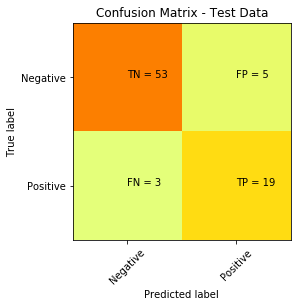

In [56]:
# let's visit our old friend the confusion matrix to see how well our model performs
# by comparing our y test data against our y predicted data
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

# let's plot the confusion matrix
# Thanks to the following site for excellent plot code for confusion matrices: 
# http://www.tarekatwan.com/index.php/2017/12/how-to-plot-a-confusion-matrix-in-python/
#
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
#
# we'll see that the model has a precision of 95 for not identifying false purchases, and 79 for 
# For 22 purchases, only 3 where identified as non-purchases or 86% accuracy, for 58 non-purchases
# only 5 where identified as purchases or 91% accuracy.

## Visualizing the Decision Tree Classifier Results

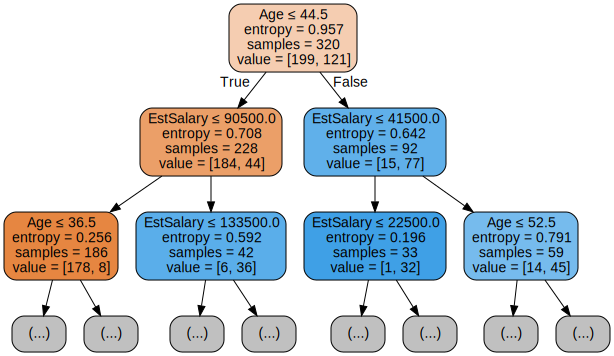

In [57]:
# let's try another graphical view
from sklearn import tree
import graphviz
from graphviz import Source

feature_names = ['Age', 'EstSalary']
tree_graph_shallow = tree.export_graphviz(classifier, out_file=None, filled=True, rounded=True, special_characters=True, max_depth = 2, feature_names=feature_names)
tree_graph_full = tree.export_graphviz(classifier, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=feature_names)
graph = graphviz.Source(tree_graph_shallow)
graph.render("SUV_shallow", view=True)
Source.from_file("SUV_shallow")


In [58]:
# render the full tree to file
graph = graphviz.Source(tree_graph_full)
graph.render("SUV_full", view=True)

'SUV_full.pdf'